In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("Crop_Recommendation_data.csv")

In [3]:
df.head()

,month,soiltype,temperature,humidity,ph,range_of_water,name
0,12,2,26.0,85,6.2,42.0,tomatoes
1,1,2,27.0,80,6.3,44.0,tomatoes
2,4,1,28.0,74,6.4,46.0,tomatoes
3,5,2,29.0,75,6.5,48.5,tomatoes
4,6,1,30.0,72,6.6,50.0,tomatoes


In [4]:


# Assign column names
names = ['month', 'soiltype', 'temperature', 'humidity', 'ph', 'range_of_water', 'name']

In [5]:
X = df.iloc[: , :-1].values
y = df.iloc[:, 6].values

In [6]:
df

,month,soiltype,temperature,humidity,ph,range_of_water,name
0,12,2,26.0,85,6.2,42.0,tomatoes
1,1,2,27.0,80,6.3,44.0,tomatoes
2,4,1,28.0,74,6.4,46.0,tomatoes
3,5,2,29.0,75,6.5,48.5,tomatoes
4,6,1,30.0,72,6.6,50.0,tomatoes
5,7,1,28.0,68,6.7,52.0,tomatoes
6,8,1,29.0,65,6.8,54.5,tomatoes
7,1,1,20.0,50,6.0,33.0,peppers
8,4,1,21.0,55,6.0,35.0,peppers
9,5,1,22.0,58,6.2,38.0,peppers


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
x_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [10]:
pred = knn.predict(X_test)

In [11]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, pred))

Accuracy: 0.1


In [12]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

               precision    recall  f1-score   support

   butternuts       0.00      0.00      0.00         3
      carrots       0.00      0.00      0.00         4
      peppers       0.10      1.00      0.18         1
sweetpotatoes       0.00      0.00      0.00         1
     tomatoes       0.00      0.00      0.00         1

     accuracy                           0.10        10
    macro avg       0.02      0.20      0.04        10
 weighted avg       0.01      0.10      0.02        10

[[0 0 3 0 0]
 [0 0 4 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]]


C:\Users\paulu\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\paulu\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\paulu\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
error_rate = []

# Will take some time
for i in range(1,30):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

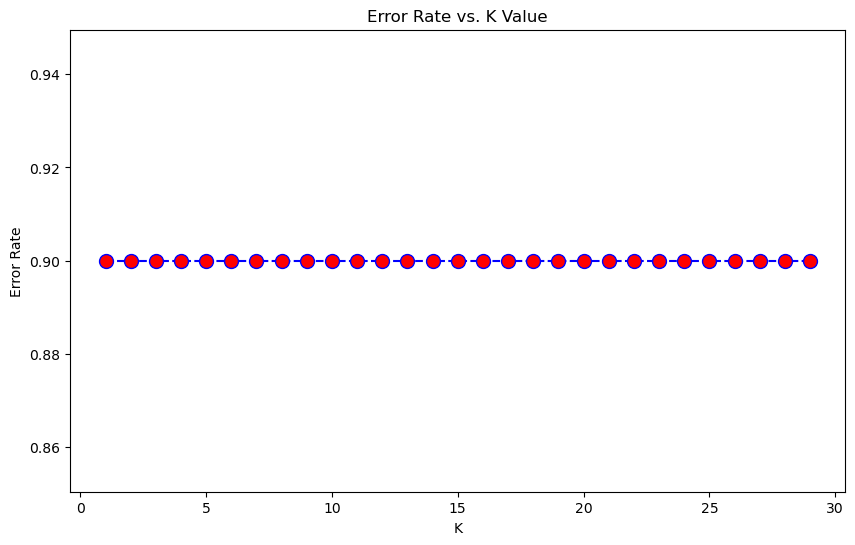

In [14]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [15]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[0 0 3 0 0]
 [0 0 4 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]]


               precision    recall  f1-score   support

   butternuts       0.00      0.00      0.00         3
      carrots       0.00      0.00      0.00         4
      peppers       0.10      1.00      0.18         1
sweetpotatoes       0.00      0.00      0.00         1
     tomatoes       0.00      0.00      0.00         1

     accuracy                           0.10        10
    macro avg       0.02      0.20      0.04        10
 weighted avg       0.01      0.10      0.02        10



C:\Users\paulu\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\paulu\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\paulu\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
# NOW WITH K=23
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=23


[[0 0 0 3 0]
 [0 0 0 4 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]]


               precision    recall  f1-score   support

   butternuts       0.00      0.00      0.00         3
      carrots       0.00      0.00      0.00         4
      peppers       0.00      0.00      0.00         1
sweetpotatoes       0.10      1.00      0.18         1
     tomatoes       0.00      0.00      0.00         1

     accuracy                           0.10        10
    macro avg       0.02      0.20      0.04        10
 weighted avg       0.01      0.10      0.02        10



C:\Users\paulu\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\paulu\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\paulu\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
knn.predict([[10,3,23,25,7.6,85]])

array(['butternuts'], dtype=object)

In [21]:
from sklearn.ensemble import RandomForestClassifier

random=RandomForestClassifier(n_estimators=1)

random.fit(X_train,y_train)
y_pred=random.predict(X_test)

In [22]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, pred))

Accuracy: 0.1


In [20]:
random.predict([[7,3,70,91,6.6,31]])

array(['carrots'], dtype=object)

In [96]:
import pickle
filename = "model.pkl"
pickle.dump(random, open(filename, 'wb'))